In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, utils
from keras.layers import LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
#1 попробуем добавить Data Augemntastion
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        1

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=100, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/100
782/782 [==============================] - 170s 215ms/step - loss: 1.8306 - accuracy: 0.3608 - val_loss: 4.8069 - val_accuracy: 0.2576
Epoch 2/100
782/782 [==============================] - 166s 213ms/step - loss: 1.4327 - accuracy: 0.4845 - val_loss: 1.1793 - val_accuracy: 0.5943
Epoch 3/100
782/782 [==============================] - 164s 209ms/step - loss: 1.2828 - accuracy: 0.5412 - val_loss: 1.1526 - val_accuracy: 0.6098
Epoch 4/100
782/782 [==============================] - 164s 209ms/step - loss: 1.1905 - accuracy: 0.5762 - val_loss: 0.9313 - val_accuracy: 0.6716
Epoch 5/100
782/782 [==============================] - 167s 213ms/step - loss: 1.1340 - accuracy: 0.6007 - val_loss: 1.1973 - val_accuracy: 0.6133
Epoch 6/100
782/782 [==============================] - 163s 209ms/step - loss: 1.0940 - accuracy: 0.6158 - val_loss: 1.2047 - val_accuracy: 0.5807
Epoch 7/100
782/782 [==============================] - 163s 208ms/step - loss: 1.0668 - accuracy: 0.6243 - val_loss: 1

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("Точность на тестовом наборе данных:", test_accuracy)

313/313 - 7s - loss: 0.6358 - accuracy: 0.7792 - 7s/epoch - 23ms/step
Точность на тестовом наборе данных: 0.77920001745224


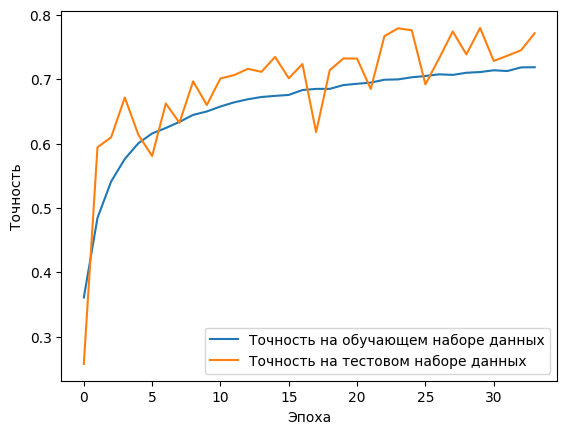

In [ ]:
plt.plot(history.history['accuracy'], label='Точность на обучающем наборе данных')
plt.plot(history.history['val_accuracy'], label='Точность на тестовом наборе данных')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()